In [1]:
 pip install iso3166

In [2]:
pip install plotly.express

In [3]:
!pip install millify

In [4]:
pip install transformers

In [5]:
!pip install pyyaml==5.4.1

In [6]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import plotly
import plotly.graph_objs as go
import plotly.express as px 
from plotly.offline import init_notebook_mode, iplot

from millify     import millify
from scipy.stats import norm
from wordcloud   import WordCloud, STOPWORDS
from textblob import TextBlob
import re
from collections import Counter

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from IPython.display import Markdown as md


# import cufflinks as cf
# from plotly.offline import download_plotlyjs , init_notebook_mode
# init_notebook_mode(connected = True)
# cf.go_offline()

from iso3166 import countries



import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df = pd.read_csv('/content/drive/MyDrive/sentiment analysis/covid19_tweets.csv')
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


In [10]:
df.describe()

,user_followers,user_friends,user_favourites
count,1.791080e+05,179108.000000,1.791080e+05
mean,1.090555e+05,2121.701566,1.444411e+04
std,8.414670e+05,9162.553072,4.452270e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.720000e+02,148.000000,2.060000e+02
50%,9.920000e+02,542.000000,1.791000e+03
75%,5.284000e+03,1725.250000,9.388000e+03
max,4.944256e+07,497363.000000,2.047197e+06


In [11]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].apply(lambda x : x.year)
df['month'] = df['date'].apply(lambda x : x.month)
df['weekday'] = df['date'].apply(lambda x : x.weekday())
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,year,month,weekday
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,2020,7,5
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,2020,7,5
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,2020,7,5
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,2020,7,5
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,2020,7,5


In [12]:
#Let's find out about the missing values in the dataset by executing the code below:
df.isna().sum()

user_name               0
user_location       36771
user_description    10286
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            51334
source                 77
is_retweet              0
year                    0
month                   0
weekday                 0
dtype: int64

In [13]:
missing_values = pd.DataFrame()
missing_values['column'] = df.columns

missing_values['percent'] = [round(100* df[col].isnull().sum() / len(df), 2) for col in df.columns]
missing_values = missing_values.sort_values('percent')
missing_values = missing_values[missing_values['percent']>0]

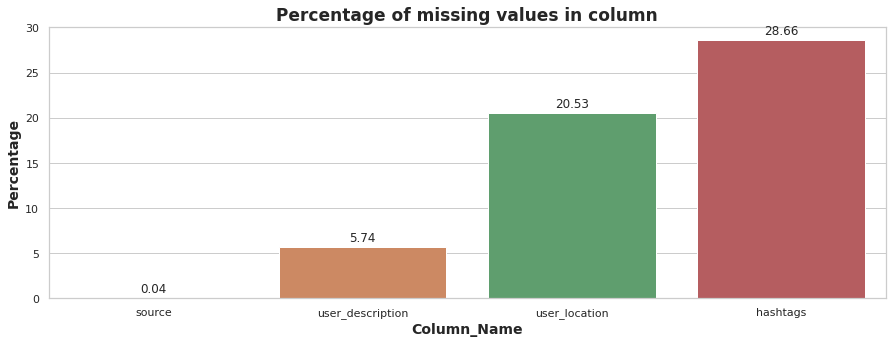

In [14]:
plt.figure(figsize=(15, 5))
sns.set(style='whitegrid', color_codes=True)
splot=sns.barplot(x='column', y='percent', data=missing_values)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.xlabel("Column_Name", size=14, weight="bold")
plt.ylabel("Percentage", size=14, weight="bold")
plt.title("Percentage of missing values in column",fontweight="bold",size=17)
plt.show()

In [15]:

ds = df['user_name'].value_counts().reset_index()
ds.columns = ['user_name', 'tweets_count']
ds = ds.sort_values(['tweets_count'])

fig = px.bar(
    ds.tail(40), 
    x="tweets_count", 
    y="user_name", 
    orientation='h', 
    title='Top 40 users by number of tweets', 
    width=800, 
    height=800
)

fig.show()


In [16]:
def pie_count(data, field, percent_limit, title):
    
    data[field] = data[field].fillna('NA')
    data = data[field].value_counts().to_frame()

    total = data[field].sum()
    data['percentage'] = 100 * data[field]/total    

    percent_limit = percent_limit
    otherdata = data[data['percentage'] < percent_limit] 
    others = otherdata['percentage'].sum()  
    maindata = data[data['percentage'] >= percent_limit]

    data = maindata
    other_label = "Others(<" + str(percent_limit) + "% each)"
    data.loc[other_label] = pd.Series({field:otherdata[field].sum()}) 
    
    labels = data.index.tolist()   
    datavals = data[field].tolist()
    
    trace=go.Pie(labels=labels,values=datavals)

    layout = go.Layout(
        title = title,
        height=500,
        width=600
        )
    
    fig = go.Figure(data=[trace], layout=layout)
    iplot(fig)
    
pie_count(df, 'user_location', 0.5, 'Number of tweets per location')

In [17]:
df['date'] = pd.to_datetime(df['date']) 
df = df.sort_values(['date'])
df['day'] = df['date'].astype(str).str.split(' ', expand=True)[0]
df['time'] = df['date'].astype(str).str.split(' ', expand=True)[1]
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,year,month,weekday,day,time
17175,Jessica Luther Rummel,"Denton, Texas",Mother. Partner. Scholar. Activist. Alchemist....,2020-07-05 03:28:16,234,28,220,False,2020-07-24 23:47:08,PROTESTORS NEEDED 6PM-10PM DAILY (NOW). 1450 E...,NaN,Twitter Web App,False,2020,7,4,2020-07-24,23:47:08
17174,Dr. Lipi #TrustDrFauci Roy,"New York, USA",@NBCNews @MSNBC @Forbes Medical Contributor | ...,2009-10-11 18:46:51,12485,4603,38120,True,2020-07-24 23:47:12,Always honored to speak w @NicolleDWallace abo...,['covid19'],Twitter Web App,False,2020,7,4,2020-07-24,23:47:12
17173,Patty Hayes,"Seattle, WA",Director of Public Health - Seattle & King Cou...,2017-07-07 18:56:50,718,162,2276,False,2020-07-24 23:47:12,"Excellent partnership to prevent #COVID19, tha...",['COVID19'],Twitter for Android,False,2020,7,4,2020-07-24,23:47:12
17172,Clive Gorman,"Victoria, British Columbia",Marketing Director @CNEGames for @idlechampion...,2011-12-23 02:02:35,597,224,23824,False,2020-07-24 23:47:12,Don't take your eye off the ball. There are st...,['COVID19'],Twitter for Android,False,2020,7,4,2020-07-24,23:47:12
17171,Tristyn Russelo,"Alberta, Canada",NaN,2017-06-14 22:01:54,5,68,57,False,2020-07-24 23:47:13,"Apparently, at the Timberlea @saveonfoods stor...",NaN,Twitter Web App,False,2020,7,4,2020-07-24,23:47:13


In [18]:
df['location'] = df['user_location'].str.split(',', expand=True)[1].str.lstrip().str.rstrip()
res = df.groupby(['day', 'location'])['text'].count().reset_index()

In [19]:

country_dict = {}
for c in countries:
    country_dict[c.name] = c.alpha3
    
res['alpha3'] = res['location']
res = res.replace({"alpha3": country_dict})

country_list = ['England', 'United States', 'United Kingdom', 'London', 'UK']

res = res[
    (res['alpha3'] == 'USA') | 
    (res['location'].isin(country_list)) | 
    (res['location'] != res['alpha3'])
]

gbr = ['England', 'UK', 'London', 'United Kingdom']
us = ['United States', 'NY', 'CA', 'GA']

res = res[res['location'].notnull()]
res.loc[res['location'].isin(gbr), 'alpha3'] = 'GBR'
res.loc[res['location'].isin(us), 'alpha3'] = 'USA'
res.loc[res['alpha3'] == 'USA', 'location'] = 'USA'
res.loc[res['alpha3'] == 'GBR', 'location'] = 'United Kingdom'
plot = res.groupby(['day', 'location', 'alpha3'])['text'].sum().reset_index()
plot

,day,location,alpha3,text
0,2020-07-24,Australia,AUS,3
1,2020-07-24,Canada,CAN,5
2,2020-07-24,Colombia,COL,1
3,2020-07-24,India,IND,1
4,2020-07-24,Ireland,IRL,1
...,...,...,...,...
1439,2020-08-30,Uganda,UGA,9
1440,2020-08-30,United Arab Emirates,ARE,15
1441,2020-08-30,United Kingdom,GBR,205
1442,2020-08-30,Zambia,ZMB,1


In [20]:
fig = px.choropleth(
    plot, 
    locations="alpha3",
    hover_name='location',
    color="text",
    animation_frame='day',
    projection="natural earth",
    color_continuous_scale=px.colors.sequential.Plasma,
    title='Tweets from different countries for every day',
    width=800, 
    height=600
)
fig.show()

In [21]:
res = df.groupby(['day', 'location', 'user_name'])['text'].count().reset_index()
res = res[['day', 'location', 'user_name']]
res['alpha3'] = res['location']
res = res.replace({"alpha3": country_dict})

country_list = ['England', 'United States', 'United Kingdom', 'London', 'UK']

res = res[
    (res['alpha3'] == 'USA') | 
    (res['location'].isin(country_list)) | 
    (res['location'] != res['alpha3'])
]

gbr = ['England', 'UK', 'London', 'United Kingdom']
us = ['United States', 'NY', 'CA', 'GA']

res = res[res['location'].notnull()]
res.loc[res['location'].isin(gbr), 'alpha3'] = 'GBR'
res.loc[res['location'].isin(us), 'alpha3'] = 'USA'
res.loc[res['alpha3'] == 'USA', 'location'] = 'USA'
res.loc[res['alpha3'] == 'GBR', 'location'] = 'United Kingdom'
plot = res.groupby(['day', 'location', 'alpha3'])['user_name'].count().reset_index()

In [22]:
fig = px.choropleth(
    plot, 
    locations="alpha3",
    hover_name='location',
    color="user_name",
    animation_frame='day',
    projection="natural earth",
    color_continuous_scale=px.colors.sequential.Plasma,
    title='Numbers of active users for every day',
    width=800, 
    height=600
)
fig.show()

In [23]:
data = pd.read_csv("/content/drive/MyDrive/sentiment analysis/finalSentimentdata2.csv")

In [24]:
data.head()

,Unnamed: 0,sentiment,text
0,3204,sad,agree the poor in india are treated badly thei...
1,1431,joy,if only i could have spent the with this cutie...
2,654,joy,will nature conservation remain a priority in ...
3,2530,sad,coronavirus disappearing in italy show this to...
4,2296,sad,uk records lowest daily virus death toll since...


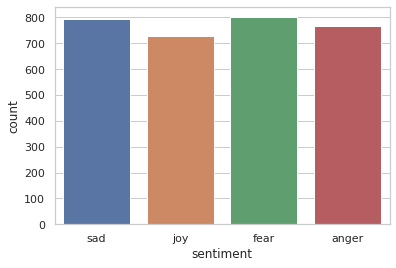

In [25]:
sns.countplot(data['sentiment'])

In [26]:
import nltk
import re
import string

In [27]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [28]:
data['text'] = data['text'].apply(lambda x: clean_text(x))

In [29]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [30]:
data['text']=data['text'].apply(lambda x: remove_emoji(x))

In [31]:
data['text'].apply(lambda x:len(str(x).split())).max()

61

In [32]:
from wordcloud import WordCloud, STOPWORDS

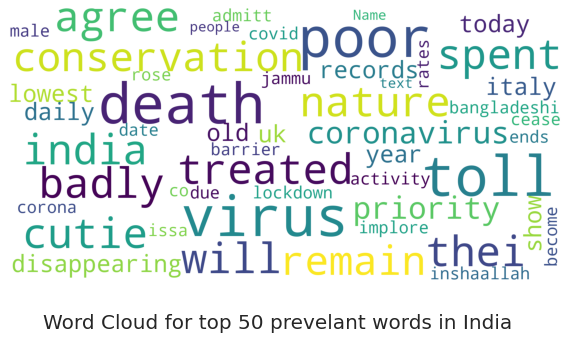

In [33]:
 word_cloud = WordCloud(
                    background_color='white',
                    stopwords=set(STOPWORDS),
                    max_words=50,
                    max_font_size=40,
                    scale=5,
                    random_state=1).generate(str(data['text']))
fig = plt.figure(1, figsize=(10,10))
plt.axis('off')
fig.suptitle('Word Cloud for top 50 prevelant words in India', fontsize=20)
fig.subplots_adjust(top=2.3)
plt.imshow(word_cloud)
plt.show()

In [34]:
from sklearn.preprocessing import LabelEncoder
lb= LabelEncoder()

In [35]:
lb.fit(data['sentiment'])

LabelEncoder()

In [36]:
classes= list(lb.classes_)

In [37]:
classes

['anger', 'fear', 'joy', 'sad']

In [38]:
data['sentiment']= lb.fit_transform(data['sentiment'])

In [39]:
data.head()

,Unnamed: 0,sentiment,text
0,3204,3,agree the poor in india are treated badly thei...
1,1431,2,if only i could have spent the with this cutie...
2,654,2,will nature conservation remain a priority in ...
3,2530,3,coronavirus disappearing in italy show this to...
4,2296,3,uk records lowest daily virus death toll since...


In [40]:
import torch
import torch.nn as nn

In [41]:
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
from torch.utils.data import Dataset, DataLoader

In [42]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

In [43]:
#setting device to GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [44]:
device

device(type='cpu')

In [45]:
PRE_TRAINED_MODEL_NAME = 'bert-base-uncased'

In [46]:
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [47]:
sample_txt = 'These are tough times we must stand together'

In [48]:
tokens = tokenizer.tokenize(sample_txt)
token_ids = tokenizer.convert_tokens_to_ids(tokens)
print(f' Sentence: {sample_txt}')
print(f'   Tokens: {tokens}')
print(f'Token IDs: {token_ids}')

 Sentence: These are tough times we must stand together
   Tokens: ['these', 'are', 'tough', 'times', 'we', 'must', 'stand', 'together']
Token IDs: [2122, 2024, 7823, 2335, 2057, 2442, 3233, 2362]


In [49]:
encoding = tokenizer.encode_plus(
  sample_txt,
  max_length=32,
  add_special_tokens=True, # Add '[CLS]' and '[SEP]'
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',  # Return PyTorch tensors
)
encoding.keys()

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


dict_keys(['input_ids', 'attention_mask'])

In [50]:
token_lens = []
for txt in data.text:
    
    tokens = tokenizer.encode(txt, max_length=512)
    token_lens.append(len(tokens))

Text(0.5, 0, 'Token count')

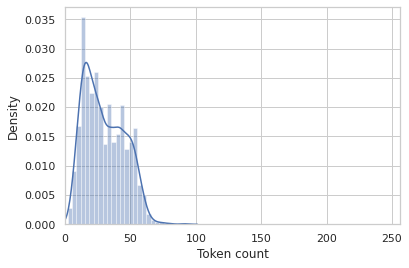

In [51]:
sns.distplot(token_lens)
plt.xlim([0, 256]);
plt.xlabel('Token count')

In [52]:
MAX_LEN=100

In [53]:
class Covid19Tweet(Dataset):
    
    def __init__(self, tweets, sentiment, tokenizer, max_len):
        
        
        self.tweets = tweets
        self.sentiment = sentiment
        self.tokenizer = tokenizer
        self.max_len = max_len
    def __len__(self):
        return len(self.tweets)
    def __getitem__(self, item):
        
        tweets = str(self.tweets[item])
        sentiment = self.sentiment[item]
        encoding = self.tokenizer.encode_plus(
        tweets,
        add_special_tokens=True,
        max_length=self.max_len,
        return_token_type_ids=False,
        pad_to_max_length=True,
        return_attention_mask=True,
        return_tensors='pt')
        return {
        'tweet_text': tweets,
         'input_ids': encoding['input_ids'].flatten(),
         'attention_mask': encoding['attention_mask'].flatten(),
         'sentiments': torch.tensor(sentiment, dtype=torch.long)
          }

In [54]:
data.head()

,Unnamed: 0,sentiment,text
0,3204,3,agree the poor in india are treated badly thei...
1,1431,2,if only i could have spent the with this cutie...
2,654,2,will nature conservation remain a priority in ...
3,2530,3,coronavirus disappearing in italy show this to...
4,2296,3,uk records lowest daily virus death toll since...


In [55]:
from sklearn.model_selection import train_test_split

In [56]:
train, val = train_test_split(
  data,
  test_size=0.1,
  random_state=RANDOM_SEED
)

In [57]:
train.shape,val.shape

((2781, 3), (309, 3))

In [58]:
def create_data_loader(data, tokenizer, max_len, batch_size):
    
    ds = Covid19Tweet(tweets=data.text.to_numpy(),
    sentiment=data.sentiment.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len)
    return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=4)
BATCH_SIZE = 32
train_data_loader = create_data_loader(train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(val, tokenizer, MAX_LEN, BATCH_SIZE)

In [59]:
df = next(iter(train_data_loader))
df.keys()

dict_keys(['tweet_text', 'input_ids', 'attention_mask', 'sentiments'])

In [60]:
print(df['input_ids'].shape)
print(df['attention_mask'].shape)
print(df['sentiments'].shape)

torch.Size([32, 100])
torch.Size([32, 100])
torch.Size([32])


In [61]:
bert_model = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [62]:
class SentimentClassifier(nn.Module):
    
    def __init__(self, n_classes):
        
        super(SentimentClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME,  return_dict=False)
        self.drop = nn.Dropout(p=0.3)
        self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
    def forward(self, input_ids, attention_mask):
        
        _, pooled_output = self.bert(
        input_ids=input_ids,
        attention_mask=attention_mask
    )
        output = self.drop(pooled_output)
        return self.out(output)

In [63]:
n_classes= 4

In [64]:
model = SentimentClassifier(n_classes)
model = model.to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [65]:
input_ids = df['input_ids'].to(device)
attention_mask = df['attention_mask'].to(device)

In [66]:
print(input_ids.shape) # batch size x seq length
print(attention_mask.shape)

torch.Size([32, 100])
torch.Size([32, 100])


In [67]:
import torch.nn.functional as F

In [68]:
F.softmax(model(input_ids, attention_mask))


tensor([[0.2135, 0.2156, 0.2768, 0.2941],
        [0.1782, 0.1983, 0.2902, 0.3333],
        [0.1790, 0.2430, 0.3028, 0.2753],
        [0.2508, 0.1772, 0.3385, 0.2335],
        [0.1719, 0.2428, 0.3280, 0.2573],
        [0.1623, 0.1682, 0.3329, 0.3366],
        [0.1868, 0.2135, 0.2875, 0.3121],
        [0.3090, 0.2343, 0.2237, 0.2330],
        [0.2319, 0.1994, 0.2077, 0.3609],
        [0.1288, 0.2139, 0.3706, 0.2866],
        [0.2614, 0.2518, 0.2471, 0.2397],
        [0.2201, 0.2838, 0.2806, 0.2155],
        [0.1523, 0.2685, 0.3236, 0.2556],
        [0.1391, 0.2178, 0.4012, 0.2419],
        [0.1650, 0.1860, 0.2071, 0.4418],
        [0.1438, 0.1831, 0.3421, 0.3311],
        [0.2613, 0.2098, 0.3167, 0.2121],
        [0.2465, 0.2086, 0.2958, 0.2492],
        [0.2119, 0.2386, 0.3319, 0.2176],
        [0.2086, 0.2989, 0.2538, 0.2388],
        [0.2567, 0.1768, 0.2566, 0.3099],
        [0.1178, 0.2841, 0.2551, 0.3430],
        [0.2228, 0.1993, 0.2422, 0.3357],
        [0.1741, 0.2366, 0.2898, 0

In [69]:
model.parameters

<bound method Module.parameters of SentimentClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((

In [70]:
EPOCHS = 5
optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)
loss_fn = nn.CrossEntropyLoss().to(device)

In [71]:
def train_epoch(model,data_loader,loss_fn,optimizer,device,scheduler, n_examples):  
    model = model.train()
    losses = []
    correct_predictions = 0
    for d in data_loader:
        
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        targets = d["sentiments"].to(device)
        outputs = model(input_ids=input_ids,attention_mask=attention_mask)
        _, preds = torch.max(outputs, dim=1)
        loss = loss_fn(outputs, targets)
        correct_predictions += torch.sum(preds == targets)
        losses.append(loss.item())
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()
    return correct_predictions.double() / n_examples, np.mean(losses)


In [72]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
    
    model = model.eval()
    losses = []
    correct_predictions = 0
    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["sentiments"].to(device)
            outputs = model(input_ids=input_ids,attention_mask=attention_mask)
            _, preds = torch.max(outputs, dim=1)
            loss = loss_fn(outputs, targets)
            correct_predictions += torch.sum(preds == targets)
            losses.append(loss.item())
        return correct_predictions.double() / n_examples, np.mean(losses)
            

In [73]:
from collections import defaultdict

In [74]:
# %%time
# history = defaultdict(list)
# best_accuracy = 0
# for epoch in range(EPOCHS):
#     print(f'Epoch {epoch + 1}/{EPOCHS}')
#     print('-' * 10)
#     train_acc, train_loss = train_epoch(model,train_data_loader,loss_fn,optimizer,device,scheduler,len(train))
#     print(f'Train loss {train_loss} accuracy {train_acc}')
#     val_acc, val_loss = eval_model(model,val_data_loader,loss_fn,device,len(val))
#     print(f'Val   loss {val_loss} accuracy {val_acc}')
#     print()
#     history['train_acc'].append(train_acc)
#     history['train_loss'].append(train_loss)
#     history['val_acc'].append(val_acc)
#     history['val_loss'].append(val_loss)
#     if val_acc > best_accuracy:
        
#         torch.save(model.state_dict(), '/content/drive/MyDrive/sentiment analysis/bert base uncased/pytorch_model.bin')
#         best_accuracy = val_acc

In [75]:
model = SentimentClassifier(n_classes)
model.load_state_dict(torch.load('/content/drive/MyDrive/sentiment analysis/bert base uncased/pytorch_model.bin'))
model = model.to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [76]:
review_text = 'Life has come to standstill due to this pandemic, milllions have lost their job '

In [77]:
encoded_review = tokenizer.encode_plus(review_text,max_length=MAX_LEN,add_special_tokens=True,
                                           return_token_type_ids=False,pad_to_max_length=True,return_attention_mask=True,
                                           return_tensors='pt')

In [78]:
input_ids = encoded_review['input_ids'].to(device)
attention_mask = encoded_review['attention_mask'].to(device)
output = model(input_ids, attention_mask)
_, prediction = torch.max(output, dim=1)
print('Review text :{}'.format(review_text))
print('Sentiment :{}'.format(classes[prediction]))

Review text :Life has come to standstill due to this pandemic, milllions have lost their job 
Sentiment :sad


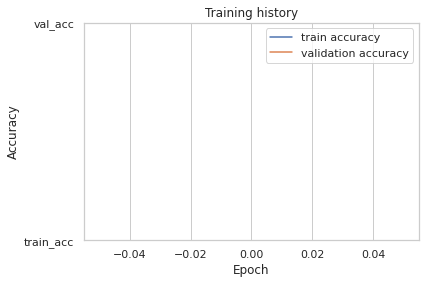

In [79]:
plt.plot(['train_acc'], label='train accuracy')
plt.plot(['val_acc'], label='validation accuracy')
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);